<a href="https://colab.research.google.com/github/suryavanshi18/Machine-Learning/blob/main/CNN_PGDBDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/X_ray_PNUEMONIA_Detection.zip'

Archive:  /content/X_ray_PNUEMONIA_Detection.zip
  inflating: X_ray_PNUEMONIA_Detection/Pneumonia_detection_using_Transfer_Learning.ipynb  
  inflating: X_ray_PNUEMONIA_Detection/test_small.zip  
  inflating: X_ray_PNUEMONIA_Detection/train_small.zip  


In [ ]:
!unzip '/content/X_ray_PNUEMONIA_Detection/test_small.zip'

Archive:  /content/X_ray_PNUEMONIA_Detection/test_small.zip
   creating: test_small/
   creating: test_small/NORMAL/
  inflating: test_small/NORMAL/IM-0001-0001.jpeg  
  inflating: test_small/NORMAL/IM-0003-0001.jpeg  
  inflating: test_small/NORMAL/IM-0005-0001.jpeg  
  inflating: test_small/NORMAL/IM-0006-0001.jpeg  
  inflating: test_small/NORMAL/IM-0007-0001.jpeg  
  inflating: test_small/NORMAL/IM-0009-0001.jpeg  
  inflating: test_small/NORMAL/IM-0010-0001.jpeg  
  inflating: test_small/NORMAL/IM-0011-0001-0001.jpeg  
  inflating: test_small/NORMAL/IM-0011-0001-0002.jpeg  
  inflating: test_small/NORMAL/IM-0011-0001.jpeg  
  inflating: test_small/NORMAL/IM-0013-0001.jpeg  
  inflating: test_small/NORMAL/IM-0015-0001.jpeg  
  inflating: test_small/NORMAL/IM-0016-0001.jpeg  
  inflating: test_small/NORMAL/IM-0017-0001.jpeg  
  inflating: test_small/NORMAL/IM-0019-0001.jpeg  
  inflating: test_small/NORMAL/IM-0021-0001.jpeg  
  inflating: test_small/NORMAL/IM-0022-0001.jpeg  
  infl

In [ ]:
!unzip '/content/X_ray_PNUEMONIA_Detection/train_small.zip'

Archive:  /content/X_ray_PNUEMONIA_Detection/train_small.zip
   creating: train_small/
   creating: train_small/NORMAL/
  inflating: train_small/NORMAL/IM-0115-0001.jpeg  
  inflating: train_small/NORMAL/IM-0117-0001.jpeg  
  inflating: train_small/NORMAL/IM-0119-0001.jpeg  
  inflating: train_small/NORMAL/IM-0122-0001.jpeg  
  inflating: train_small/NORMAL/IM-0125-0001.jpeg  
  inflating: train_small/NORMAL/IM-0127-0001.jpeg  
  inflating: train_small/NORMAL/IM-0128-0001.jpeg  
  inflating: train_small/NORMAL/IM-0129-0001.jpeg  
  inflating: train_small/NORMAL/IM-0131-0001.jpeg  
  inflating: train_small/NORMAL/IM-0133-0001.jpeg  
  inflating: train_small/NORMAL/IM-0135-0001.jpeg  
  inflating: train_small/NORMAL/IM-0137-0001.jpeg  
  inflating: train_small/NORMAL/IM-0140-0001.jpeg  
  inflating: train_small/NORMAL/IM-0141-0001.jpeg  
  inflating: train_small/NORMAL/IM-0143-0001.jpeg  
  inflating: train_small/NORMAL/IM-0145-0001.jpeg  
  inflating: train_small/NORMAL/IM-0147-0001.jpe

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [ ]:
IMAGE_SIZE = [224,224]
train_path='train_small'
test_path='test_small'

In [ ]:
# example of progressively loading images from file
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create generator
# generator applied random preprocessing to make the model --> robust
datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2, # every image will be randomly distorted 0-0.2
                             zoom_range = 0.2, # every image will be randomly zoomed 0-0.2
                             horizontal_flip = True, #
                             vertical_flip=True,
                             rotation_range=30) #every image will be randomly ratated 0-30 degree
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory( './train_small/',
                                       class_mode='categorical',
                                       classes=['NORMAL', 'PNEUMONIA'],
                                       target_size=(224, 224),
                                       batch_size=2,
                                       seed=7)
val_it = datagen.flow_from_directory('./test_small/',
                                       class_mode='categorical',
                                       classes=['NORMAL', 'PNEUMONIA'],
                                       target_size=(224, 224),
                                       batch_size=2,
                                       seed=7)
test_it = datagen.flow_from_directory('./test_small/',
                                       class_mode='categorical',
                                       classes=['NORMAL', 'PNEUMONIA'],
                                       target_size=(224, 224),
                                       batch_size=2,
                                       seed=7)
# confirm the iterator works
batchX, batchy = next(train_it)
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 101 images belonging to 2 classes.
Found 46 images belonging to 2 classes.
Found 46 images belonging to 2 classes.
Batch shape=(2, 224, 224, 3), min=0.000, max=0.999


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5,5),padding='valid',activation='relu',
                 input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(4,4)))
# REPEAT CONV AND POOLING layer 3 TIMES
model.add(Conv2D(64, (5,5),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Conv2D(128, (5,5),padding='valid',activation='relu'))
# model.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
# model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
# any no of dense layers
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 220, 220, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 55, 55, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 51, 51, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,315,714 (5.02 MB)

 Trainable params: 1,315,714 (5.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
832*3

2496

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_it,
  validation_data=val_it,
  epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - accuracy: 0.7131 - loss: 2.0788 - val_accuracy: 0.5000 - val_loss: 0.7260
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.7766 - loss: 0.5383 - val_accuracy: 0.5000 - val_loss: 0.6967
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.6538 - loss: 0.6503 - val_accuracy: 0.5000 - val_loss: 0.8877
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.7575 - loss: 0.4833 - val_accuracy: 0.5000 - val_loss: 1.3409
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.8196 - loss: 0.5438 - val_accuracy: 0.5000 - val_loss: 0.7257


Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.6412 - loss: 11.6598 - val_accuracy: 0.5000 - val_loss: 2.2554
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.7785 - loss: 0.9880 - val_accuracy: 0.5217 - val_loss: 1.3041
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.7627 - loss: 0.4365 - val_accuracy: 0.6739 - val_loss: 0.7255
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9180 - loss: 0.6533 - val_accuracy: 0.6304 - val_loss: 0.7929
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.8622 - loss: 0.4426 - val_accuracy: 0.4783 - val_loss: 0.8335


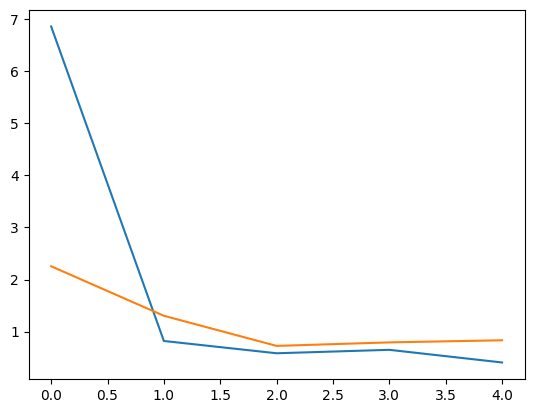

In [ ]:
#1.a
model2=Sequential()
#One Convolution
model2.add(Conv2D(32,(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
#One Pooling
model2.add(MaxPooling2D(pool_size=(2,2)))
#One Flatten
model2.add(Flatten())
#Two Dense
model2.add(Dense(128,activation='relu'))
model2.add(Dense(2,activation='softmax'))
model2.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])
history = model2.fit(
  train_it,
  validation_data=val_it,
  epochs=5)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.6733 - loss: 1.0730 - val_accuracy: 0.5000 - val_loss: 0.8202
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.7988 - loss: 0.5211 - val_accuracy: 0.5000 - val_loss: 1.0540
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.7568 - loss: 0.4840 - val_accuracy: 0.4565 - val_loss: 0.8010
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.8105 - loss: 0.5214 - val_accuracy: 0.5000 - val_loss: 0.7358
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.7201 - loss: 0.5456 - val_accuracy: 0.5000 - val_loss: 0.9500


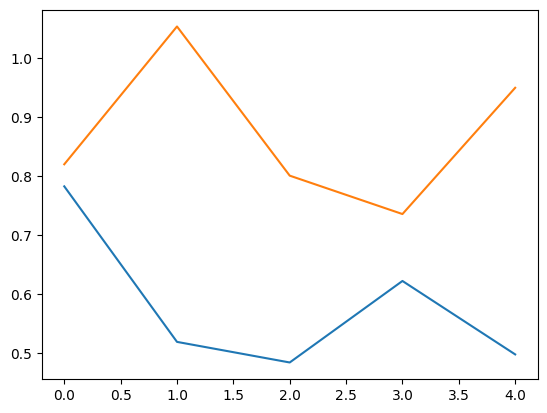

In [ ]:
#2.a
model3=Sequential()
#2 Conv
model3.add(Conv2D(32,(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model3.add(Conv2D(32,(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
#1 Pool
model3.add(MaxPooling2D(pool_size=(2,2)))
#2 Conv
model3.add(Conv2D(32,(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model3.add(Conv2D(32,(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
#1 Pool
model3.add(MaxPooling2D(pool_size=(2,2)))
#1 Flat
model3.add(Flatten())
#2 Dense
model3.add(Dense(128,activation='relu'))
model3.add(Dense(2,activation='softmax'))
model3.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])
history = model3.fit(
  train_it,
  validation_data=val_it,
  epochs=5)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.7594 - loss: 0.8246 - val_accuracy: 0.5000 - val_loss: 0.7890
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.7465 - loss: 0.7085 - val_accuracy: 0.5000 - val_loss: 0.7795
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.7626 - loss: 0.4588 - val_accuracy: 0.5000 - val_loss: 1.0137
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.7947 - loss: 0.3895 - val_accuracy: 0.6087 - val_loss: 0.9718
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.8180 - loss: 0.4189 - val_accuracy: 0.4348 - val_loss: 0.7136


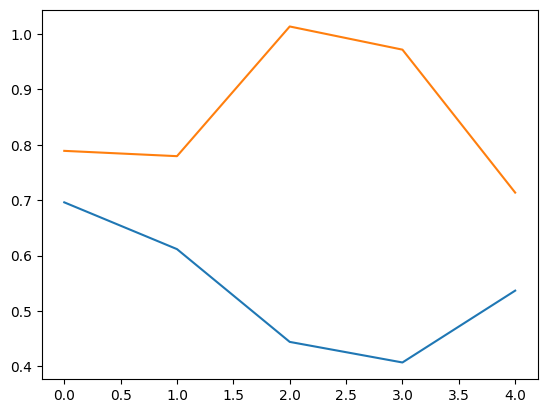

In [ ]:
#3.a
model4=Sequential()
#2 Conv
model4.add(Conv2D(32,(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model4.add(Conv2D(32,(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
#1 Pool
model4.add(MaxPooling2D(pool_size=(2,2)))
#2 Conv
model4.add(Conv2D(32,(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model4.add(Conv2D(32,(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
#1 Pool
model4.add(MaxPooling2D(pool_size=(2,2)))
#1 Flat
model4.add(Flatten())
#4 Dense
model4.add(Dense(128,activation='relu'))
model4.add(Dense(128,activation='relu'))
model4.add(Dense(128,activation='relu'))
model4.add(Dense(2,activation='softmax'))
model4.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=['accuracy'])
history = model4.fit(
  train_it,
  validation_data=val_it,
  epochs=5)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - f1_score: 0.4711 - loss: 2.8137 - val_f1_score: 0.3333 - val_loss: 0.6944
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - f1_score: 0.4013 - loss: 0.6655 - val_f1_score: 0.3333 - val_loss: 1.0775
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - f1_score: 0.4454 - loss: 0.5428 - val_f1_score: 0.3333 - val_loss: 0.8206
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - f1_score: 0.4305 - loss: 0.5633 - val_f1_score: 0.3333 - val_loss: 0.8462
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - f1_score: 0.4258 - loss: 0.5961 - val_f1_score: 0.3333 - val_loss: 0.7898


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 220, 220, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 216, 216, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 108, 108, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 104, 104, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 100, 100, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 128)                 │      10,240,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,058,216 (118.48 MB)

 Trainable params: 10,352,738 (39.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,705,478 (78.99 MB)

None


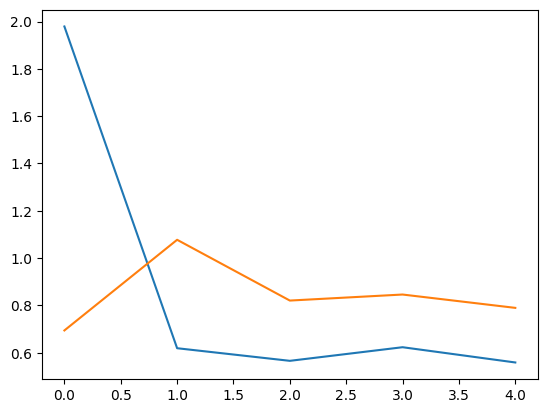

In [ ]:
#2.a
model5=Sequential()
#2 Conv
model5.add(Conv2D(32,(5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model5.add(Conv2D(32,(5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
#1 Pool
model5.add(MaxPooling2D(pool_size=(2,2)))
#2 Conv
model5.add(Conv2D(32,(5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model5.add(Conv2D(32,(5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
#1 Pool
model5.add(MaxPooling2D(pool_size=(2,2)))
#1 Flat
model5.add(Flatten())
#4 Dense
model5.add(Dense(128,activation='relu'))
model5.add(Dense(128,activation='relu'))
model5.add(Dense(128,activation='relu'))
model5.add(Dense(2,activation='softmax'))

#########
import keras
metric =keras.metrics.F1Score(threshold=0.5)
##########
model5.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=[metric])
history = model5.fit(
  train_it,
  validation_data=val_it,
  epochs=5)
print(model5.summary())
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - f1_score: 0.4348 - loss: 0.6177 - val_f1_score: 0.3333 - val_loss: 1.1424
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - f1_score: 0.4188 - loss: 0.6340 - val_f1_score: 0.3333 - val_loss: 3.3922
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - f1_score: 0.4284 - loss: 0.8185 - val_f1_score: 0.3333 - val_loss: 1.0630
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - f1_score: 0.4425 - loss: 0.6042 - val_f1_score: 0.3333 - val_loss: 0.7907
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - f1_score: 0.4518 - loss: 0.4337 - val_f1_score: 0.3333 - val_loss: 0.7949


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 111, 111, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 55, 55, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 27, 27, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 6, 6, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 296,744 (1.13 MB)

 Trainable params: 98,914 (386.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 197,830 (772.78 KB)

None


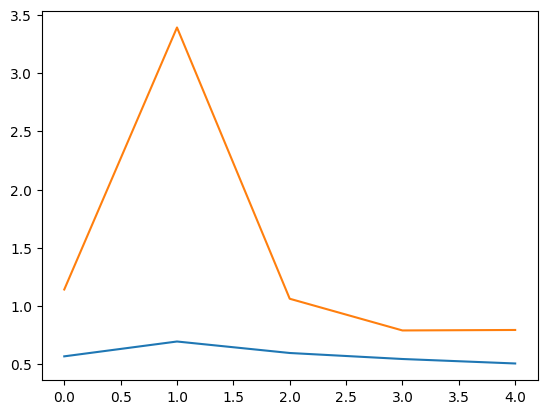

In [ ]:
#2.b
model6=Sequential()
#2 Conv
model6.add(Conv2D(32,(3,3),strides=(2,2),padding='valid',activation='relu',input_shape=(224,224,3)))
model6.add(Conv2D(32,(3,3),strides=(2,2),padding='valid',activation='relu',input_shape=(224,224,3)))
#1 Pool
model6.add(MaxPooling2D(pool_size=(2,2)))
#2 Conv
model6.add(Conv2D(32,(3,3),strides=(2,2),padding='valid',activation='relu',input_shape=(224,224,3)))
model6.add(Conv2D(32,(3,3),strides=(2,2),padding='valid',activation='relu',input_shape=(224,224,3)))
#1 Pool
model6.add(MaxPooling2D(pool_size=(2,2)))
#1 Flat
model6.add(Flatten())
#4 Dense
model6.add(Dense(128,activation='relu'))
model6.add(Dense(128,activation='relu'))
model6.add(Dense(128,activation='relu'))
model6.add(Dense(2,activation='softmax'))
#########
import keras
metric =keras.metrics.F1Score(threshold=0.5)
##########
model6.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=[metric])
history = model6.fit(
  train_it,
  validation_data=val_it,
  epochs=5)
print(model6.summary())
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 141ms/step - f1_score: 0.4766 - loss: 0.7188 - val_f1_score: 0.3333 - val_loss: 1.7894
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - f1_score: 0.4240 - loss: 0.8383 - val_f1_score: 0.3333 - val_loss: 0.8998
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - f1_score: 0.4303 - loss: 0.5015 - val_f1_score: 0.3333 - val_loss: 0.7337
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - f1_score: 0.4375 - loss: 0.4200 - val_f1_score: 0.3333 - val_loss: 0.9486
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - f1_score: 0.5331 - loss: 0.4535 - val_f1_score: 0.3333 - val_loss: 0.8062


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 112, 112, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 112, 112, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,721,320 (147.71 MB)

 Trainable params: 12,907,106 (49.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,814,214 (98.47 MB)

None


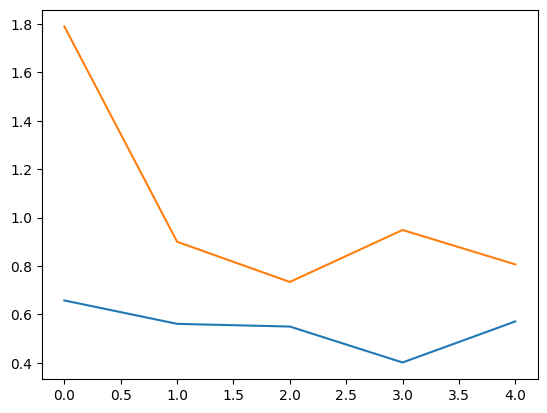

In [ ]:
#2.c
model7=Sequential()
#2 Conv
model7.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(224,224,3)))
model7.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(224,224,3)))
#1 Pool
model7.add(MaxPooling2D(pool_size=(2,2)))
#2 Conv
model7.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(224,224,3)))
model7.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(224,224,3)))
#1 Pool
model7.add(MaxPooling2D(pool_size=(2,2)))
#1 Flat
model7.add(Flatten())
#4 Dense
model7.add(Dense(128,activation='relu'))
model7.add(Dense(128,activation='relu'))
model7.add(Dense(128,activation='relu'))
model7.add(Dense(2,activation='softmax'))
#########
import keras
metric =keras.metrics.F1Score(threshold=0.5)
##########
model7.compile(
  optimizer='adam',
  loss=CategoricalCrossentropy(),
  metrics=[metric])
history = model7.fit(
  train_it,
  validation_data=val_it,
  epochs=5)
print(model7.summary())
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
#4
model8=Sequential()
#2 Conv
model8.add(Conv2D(1,(3,3),padding='same',activation='relu',input_shape=(224,224,3)))
#1 Pool
model8.add(MaxPooling2D(pool_size=(224,224)))
#1 Flat
model8.add(Flatten())
model8.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)                   │ (None, 224, 224, 1)         │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 1, 1, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28 (112.00 B)

 Trainable params: 28 (112.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#Only convolution and pooling layer

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
type(vgg)

keras.src.models.functional.Functional

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
output_classes = 2

In [ ]:
from keras import regularizers
x=Flatten()(vgg.output)
x=Dense(1000,activation='relu',kernel_regularizer=regularizers.L2(0.01))(x)
prediction=Dense(output_classes,activation='softmax')(x)

In [ ]:
from tensorflow.keras.models import Model
model=Model(inputs=vgg.input,outputs=prediction)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1000)                │      25,089,000 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 39,805,690 (151.85 MB)

 Trainable params: 25,091,002 (95.71 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
import keras
model.compile(
  loss='categorical_crossentropy',
  optimizer=keras.optimizers.Adam(
    learning_rate=0.001),
  metrics=['accuracy']
)

In [ ]:
history_vgg= model.fit(
  train_it,
  validation_data=val_it,
  epochs=10
)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.7160 - loss: 11.5841 - val_accuracy: 0.6087 - val_loss: 8.4219
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.8361 - loss: 3.4714 - val_accuracy: 0.8043 - val_loss: 2.8109
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9432 - loss: 1.7178 - val_accuracy: 0.8696 - val_loss: 1.8464
Epoch 4/10
 4/51 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9271 - loss: 1.0349

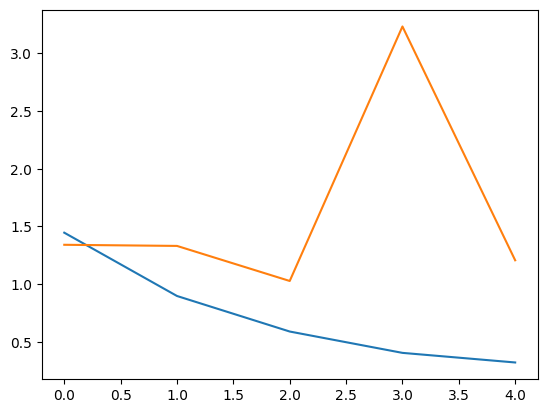

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])

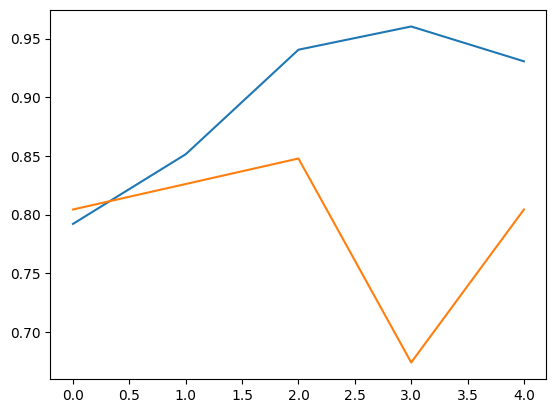

In [ ]:
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])

Mounted at /content/drive
